Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [24]:

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error, classification_report


In [13]:

df = pd.read_csv('Fraud_check.csv')
df.head()


# Map 'TaxableIncome' to categorical target variable 'Sales_Category'
df['Sales_Category'] = df['TaxableIncome'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')

# Drop the 'TaxableIncome' column
df.drop('TaxableIncome', axis=1, inplace=True)
df

,Undergrad,MaritalStatus,CityPopulation,WorkExperience,Urban,Sales_Category
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [12]:

# Perform one-hot encoding on the categorical features
categorical_columns = ['Undergrad', 'MaritalStatus', 'Urban']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df_encoded

,CityPopulation,WorkExperience,Sales_Category,Undergrad_YES,MaritalStatus_Married,MaritalStatus_Single,Urban_YES
0,50047,10,Good,0,0,1,1
1,134075,18,Good,1,0,0,1
2,160205,30,Good,0,1,0,1
3,193264,15,Good,1,0,1,1
4,27533,28,Good,0,1,0,0
...,...,...,...,...,...,...,...
595,39492,7,Good,1,0,0,1
596,55369,2,Good,1,0,0,1
597,154058,0,Good,0,0,0,1
598,180083,17,Good,1,1,0,0


In [16]:
# Separate features and target variable
X = df_encoded.drop('Sales_Category', axis=1)
y = df_encoded['Sales_Category']
X
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Sales_Category, Length: 600, dtype: object

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train,y_train

(     CityPopulation  WorkExperience  Undergrad_YES  MaritalStatus_Married  \
 145          197422               2              0                      0   
 9            155482               4              1                      0   
 375          130935               2              0                      1   
 523           42198              12              0                      0   
 188          137569              10              0                      0   
 ..              ...             ...            ...                    ...   
 71           105680              22              0                      0   
 106           58535              20              1                      0   
 270          130680               5              0                      1   
 435          111774               4              0                      0   
 102           91488              23              1                      0   
 
      MaritalStatus_Single  Urban_YES  
 145                  

In [ ]:

# Build the Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

In [20]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [25]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.7583333333333333
              precision    recall  f1-score   support

        Good       0.78      0.97      0.86        94
       Risky       0.00      0.00      0.00        26

    accuracy                           0.76       120
   macro avg       0.39      0.48      0.43       120
weighted avg       0.61      0.76      0.68       120



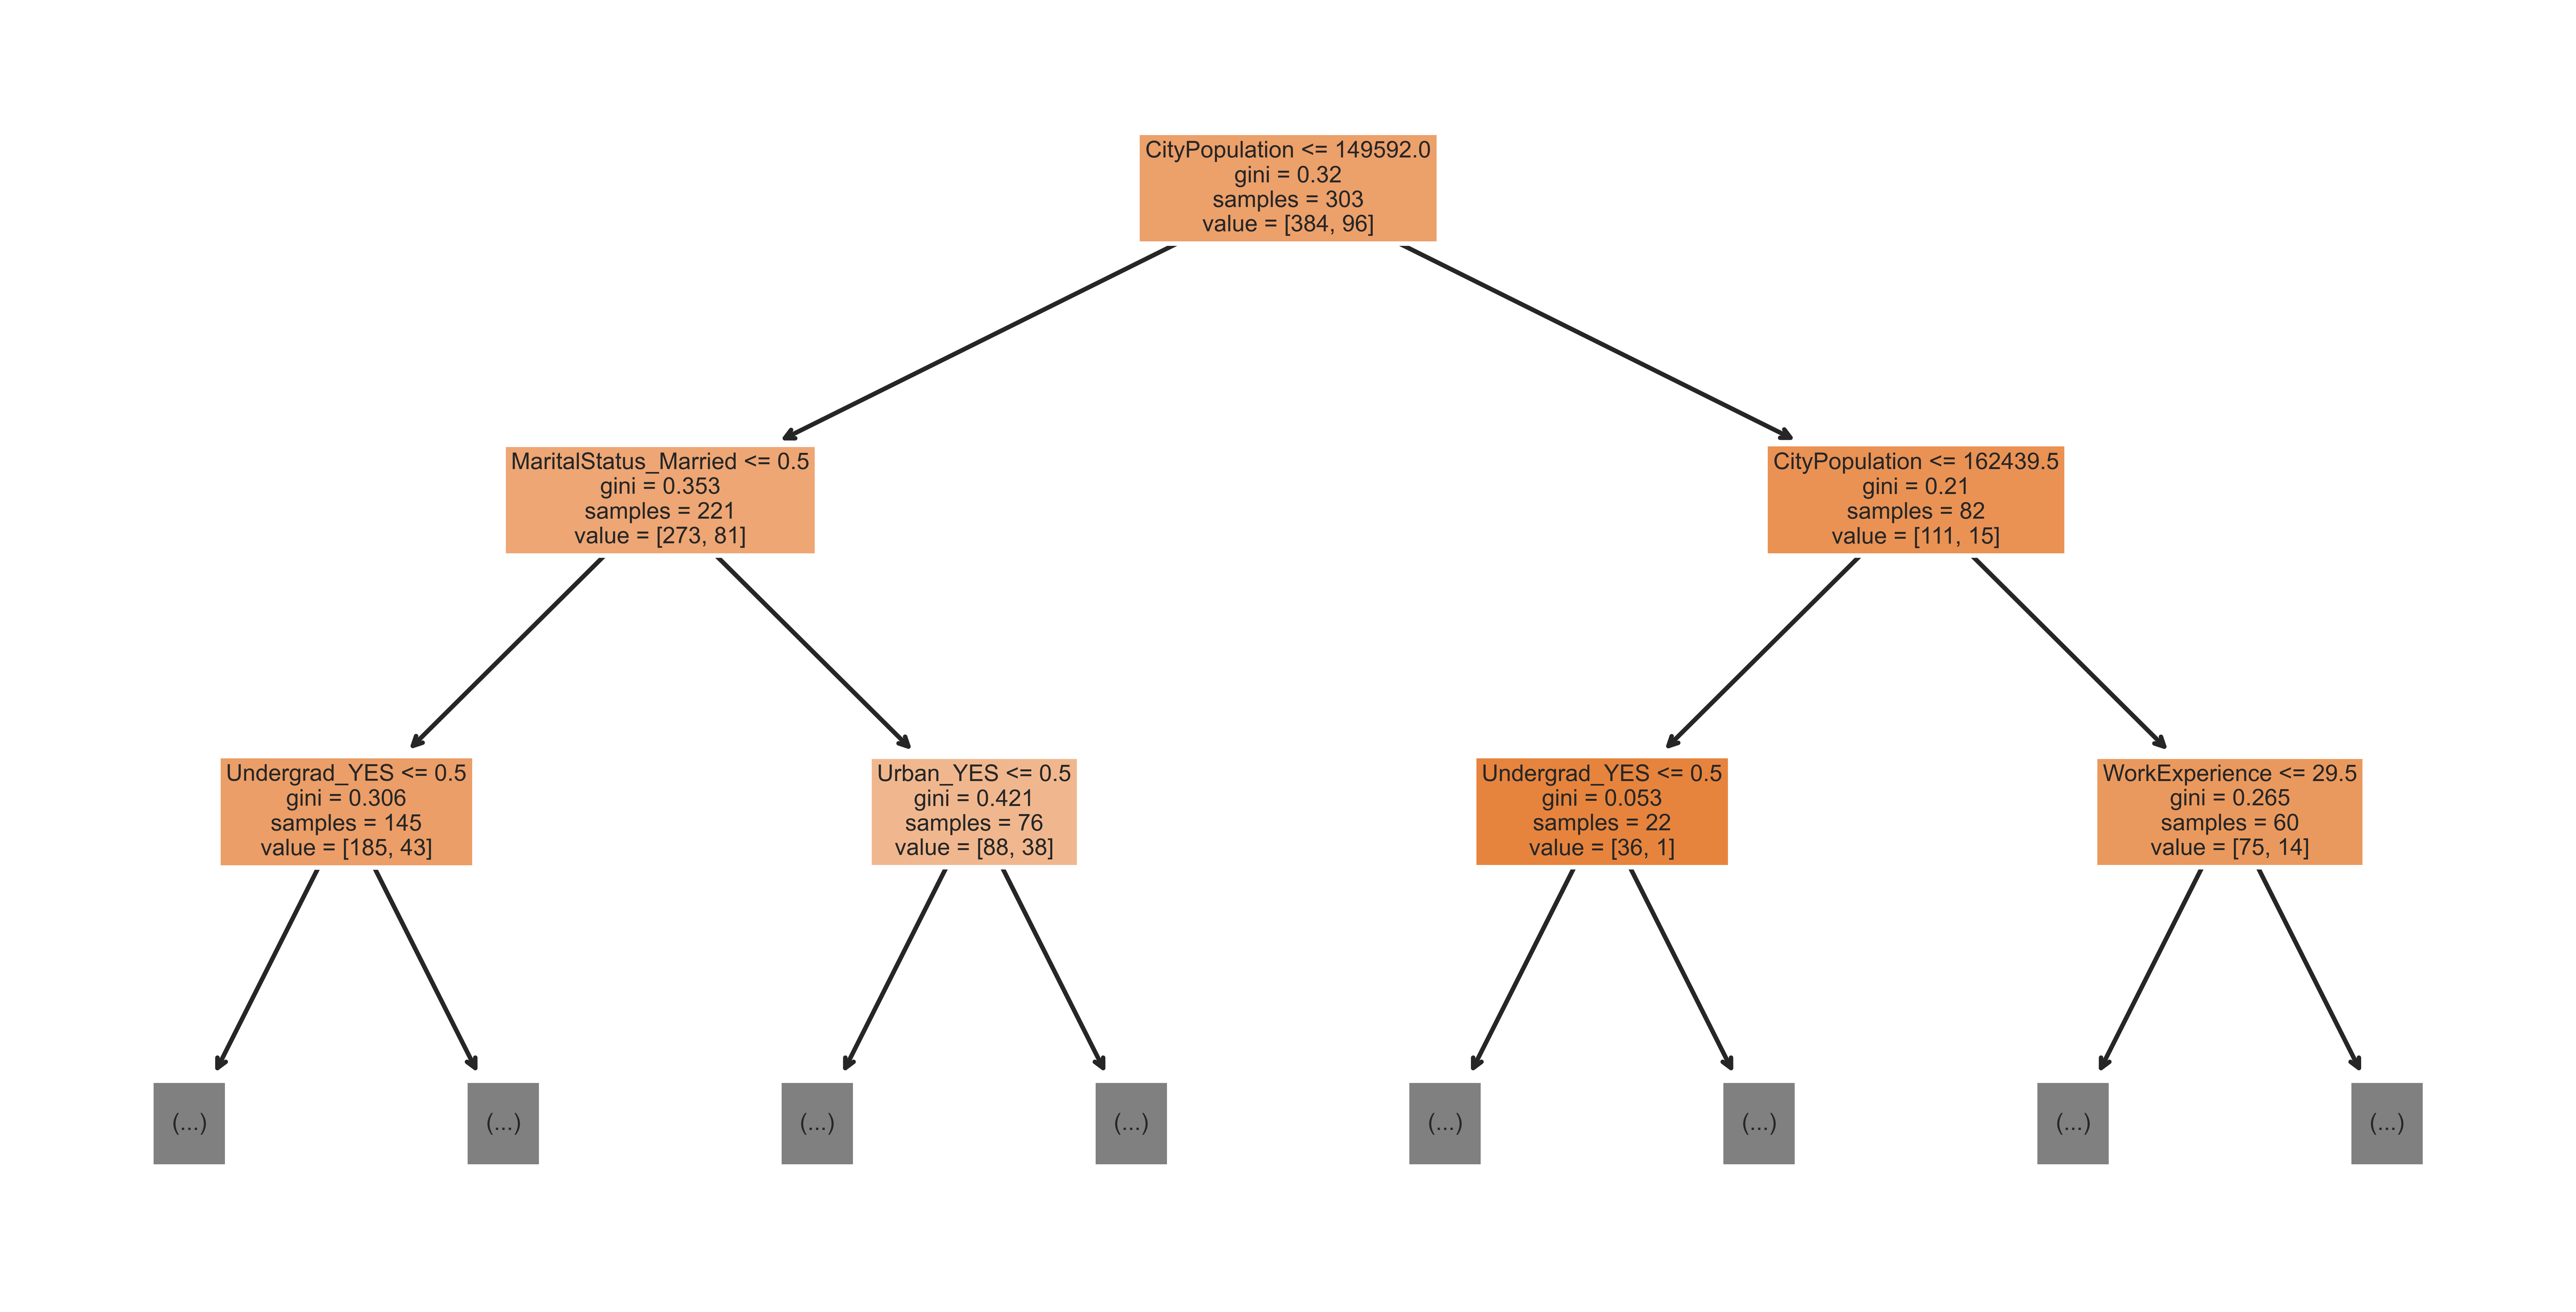

In [27]:
tree.plot_tree(model.estimators_[0], feature_names=X.columns,
              filled=True, max_depth=2)
plt.show()